In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [128]:
# RuntimeWarning: overflow encountered in exp
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))
    
# def sigmoid_activation(x):
#     x_ravel = x.ravel()  # 将numpy数组展平
#     length = len(x_ravel)
#     y = []
#     for index in range(length):
#         if x_ravel[index] >= 0:
#             y.append(1.0 / (1 + np.exp(-x_ravel[index])))
#         else:
#             y.append(np.exp(x_ravel[index]) / (np.exp(x_ravel[index]) + 1))
#     return np.array(y).reshape(x.shape)


In [129]:
def predict(X, W):
    preds = sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outpus to binary
    preds[preds <= 0.5] = 0
    preds[preds > 0.5 ] = 1
    return preds

In [130]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-e", "--epochs", type=float, default=100, help="# of epochs")
# ap.add_argument("-a", "--alpha", type=float, default=0.01, help="learning rate")
# args = vars(ap.parse_args())
args={}
args["epochs"]=100
args["alpha"]=0.01

[INFO] shape of X:  (1000, 2)
[INFO] shape of y:  (1000,)
[INFO] shape of y:  (1000, 1)


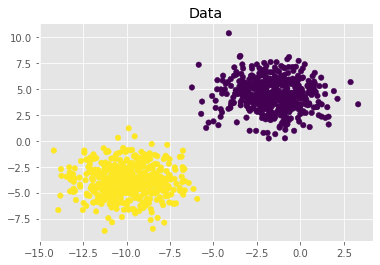

In [131]:
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
print('[INFO] shape of X: ', X.shape)
print('[INFO] shape of y: ', y.shape)

plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(X[:,0], X[:,1], marker="o", c=y, s=30)

y=y.reshape((y.shape[0], 1))
print('[INFO] shape of y: ', y.shape)

In [132]:
# insert a column of 1's as the last entry in the feature matrix
X = np.c_[X, np.ones((X.shape[0]))]
print('[INFO] X.shape[0]: ', X.shape[0])
print('[INFO] shape of X:', X.shape)

[INFO] X.shape[0]:  1000
[INFO] shape of X: (1000, 3)


In [133]:
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)
print('[INFO] shape of trainX: ', trainX.shape)
print('[INFO] shape of trainY: ', trainY.shape)
print('[INFO] shape of testX: ', testX.shape)
print('[INFO] shape of testY: ', testY.shape)

[INFO] shape of trainX:  (500, 3)
[INFO] shape of trainY:  (500, 1)
[INFO] shape of testX:  (500, 3)
[INFO] shape of testY:  (500, 1)


In [134]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
print("[INFO] shape of W", W.shape)
losses = []

[INFO] training...
[INFO] shape of W (3, 1)


In [135]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
    # preds: 500 x 1
    preds = sigmoid_activation(trainX.dot(W))
    
    # error is the difference between our predictions and the true values
    error = preds - trainY
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    # the gradient descent is the dot product between our features and the error of the predictions
    gradient = trainX.T.dot(error)
    
    # in the update stage, all we need to do is "nudge" the weight matrix in the negative direction of the gradient
    # ( hence the term "gradient descent" by taking a small step towards a set of "more optimal" parameters)
    W += -args["alpha"] * gradient
    
    # check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) %5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch+1), loss))

[INFO] epoch=1, loss=170.0885642
[INFO] epoch=5, loss=12.2054725
[INFO] epoch=10, loss=8.2737198
[INFO] epoch=15, loss=6.9851320
[INFO] epoch=20, loss=6.8451815
[INFO] epoch=25, loss=4.8242045
[INFO] epoch=30, loss=3.1225402
[INFO] epoch=35, loss=1.4750358
[INFO] epoch=40, loss=0.9421049
[INFO] epoch=45, loss=0.5124204
[INFO] epoch=50, loss=0.2713598
[INFO] epoch=55, loss=0.1685302
[INFO] epoch=60, loss=0.1214994
[INFO] epoch=65, loss=0.0964779
[INFO] epoch=70, loss=0.0812608
[INFO] epoch=75, loss=0.0710089
[INFO] epoch=80, loss=0.0635588
[INFO] epoch=85, loss=0.0578340
[INFO] epoch=90, loss=0.0532479
[INFO] epoch=95, loss=0.0494567
[INFO] epoch=100, loss=0.0462459


[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



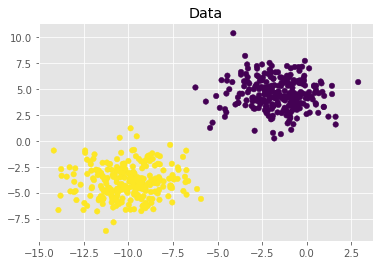

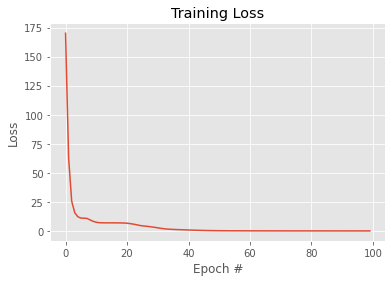

In [136]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

#plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], marker="o", c=testY, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, args["epochs"]), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()